### Import the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data and create the dataframe

In [2]:
path='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'
df=pd.read_csv(path)
df_copy = df.copy()
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


### Preparation
<ul>
<li>Create the target variable by mapping yes to 1 and no to 0.</li>
<li>Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.</li>
</ul>

In [3]:
df['card']=df.card.map(dict(yes=1, no=0))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [6]:
len(df_full_train),len(df_test)

(1055, 264)

In [7]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [8]:
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [9]:
#Reset the row numbers of the training, validation and test dataframes.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,0,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,1,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [10]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values




In [11]:
del df_train['card']
del df_val['card']
del df_test['card']



In [12]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


## Question 1

<ul>
<li>For each numerical variable, use it as score and compute AUC with the card variable.</li>
<li>Use the training dataset for that.</li>
</ul>

If your AUC is < 0.5, invert this variable by putting "-" in front (e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

<ul>
<li>reports</li>
<li>dependents</li>
<li>active</li>
<li>share</li>
</ul>


In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
numerical_features=['reports','age','income','share','expenditure','dependents','months','majorcards','active']
for feature in numerical_features:
    score = roc_auc_score(y_train,df_train[feature])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[feature])
    print('%9s, %.3f' % (feature, score))
   

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


### Training the model
From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [15]:
active_columns=["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
df_train=df_train[active_columns]
df_val=df_val[active_columns]
df_test=df_test[active_columns]


In [16]:
df_train.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner,selfemp
0,3,40.50000,4.0128,0.000299,0.00000,1,12,1,17,no,no
1,1,32.33333,6.0000,0.000200,0.00000,4,18,1,4,yes,no
2,1,29.16667,2.2000,0.038205,69.79333,0,49,1,7,no,no
3,1,54.66667,7.2900,0.106536,647.20670,2,78,1,9,yes,no
4,0,25.00000,3.3984,0.000353,0.00000,2,29,0,4,yes,no


In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2


What's the AUC of this model on the validation dataset? (round to 3 digits)

In [21]:
dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
X_val = dv.transform(dicts)


In [22]:
y_pred = model.predict_proba(X_val)[:,1]

In [23]:
roc_auc_score(y_val,y_pred)

0.995171242063847

## Question 3

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them
- At which threshold precision and recall curves intersect?



In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
t=0.5
decision = (y_pred >= t)


In [26]:
cm = confusion_matrix(y_val, decision)

In [27]:
tp = cm[0][0] 
tn = cm[1][1] 
fp = cm[0][1] 
fn = cm[1][0] 
tp,tn,fp,fn

(52, 204, 1, 7)

In [28]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
precision, recall

(0.9811320754716981, 0.8813559322033898)

In [29]:
thresholds=[]
precisions=[]
recalls=[]

for t in np.arange(0,1,0.01):
    decision = (y_pred >= t)
    cm = confusion_matrix(y_val, decision)
    tp = cm[0][0] 
    tn = cm[1][1] 
    fp = cm[0][1] 
    fn = cm[1][0] 
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    thresholds.append(round(t,3))
    precisions.append(round(precision,3))
    recalls.append(round(recall,3))


C:\Users\msarf\AppData\Local\Temp\ipykernel_51356\1711305237.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp+fn)


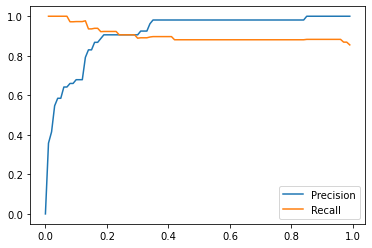

In [30]:
plt.plot(thresholds,precisions, label='Precision')
plt.plot(thresholds,recalls, label='Recall')
plt.legend()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [31]:
F1s=[]
for i in range(len(thresholds)):
    F1 = 2*precisions[i]*recalls[i] / (precisions[i]+recalls[i])
    F1s.append(F1)


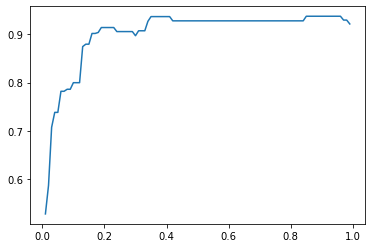

In [32]:
plt.plot(thresholds,F1s)

## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [33]:
from sklearn.model_selection import KFold

In [34]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [42]:
def train(df_train, y_train, C=1.0):
    train_dicts = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dicts)
    X_train = dv.transform(train_dicts)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train,y_train)
    return dv, model
    

In [36]:
def predict(df,dv,model):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(dicts)
    X_val = dv.transform(dicts)
    y_pred = model.predict_proba(X_val)[:,1]
    return y_pred
    

In [41]:
scores=[]
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values
    
    df_train = df_train[active_columns]
    df_val = df_val[active_columns]

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    score = roc_auc_score(y_val, y_pred)
    scores.append(score)

print('Mean and Standard Deviation of the AUC scores across different folds: %.3f +- %.3f' % (np.mean(scores), np.std(scores)), '\n')

Mean and Standard Deviation of the AUC scores across different folds: 0.996 +- 0.003 



## Question 6


Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 1, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

In [44]:
n_splits = 5

for C in [0.01, 0.1, 1, 10]:
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values
        
        df_train = df_train[active_columns]
        df_val = df_val[active_columns]

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01 0.992 +- 0.006
C=0.1 0.995 +- 0.004
C=1 0.996 +- 0.003
C=10 0.996 +- 0.003
